In [1]:
import numpy as np
import matplotlib.pylab as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import matplotlib.patheffects as PathEffects

# 분류용 데이터

In [2]:
mnist_sci = fetch_openml('mnist_784')

In [3]:
x_train, x_test, y_train_, y_test_ = train_test_split(mnist_sci.data, mnist_sci.target, 
                                                    test_size = 0.1,
                                                   shuffle = True)
x_train /= 255.0
x_test /= 255.0
y_train_ = np.array(y_train_, dtype=np.int8)
y_test_ = np.array(y_test_, dtype=np.int8)

x_val = x_train[8000:9000, :]
x_train = x_train[:8000, :]
x_test = x_test[:1000, :]

y_val = y_train_[8000:9000]
y_train = y_train_[:8000]
y_test = y_test_[:1000]

In [4]:
x_val.shape

(1000, 784)

In [5]:
y_val.shape

(1000,)

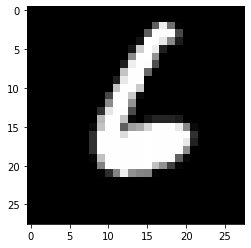

In [6]:
plt.imshow(x_train[0,:].reshape(28,28), cmap='gray')

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)

In [8]:
x_val = pca.transform(x_val)
x_test = pca.transform(x_test)

In [9]:
color_list = ['gray', 'red', 'sienna', 'bisque', 'gold', 'olive', 'green', 'teal', 'navy', 'purple']

In [10]:
x_train.shape

(8000, 10)

In [11]:
y_train_.shape

(63000,)

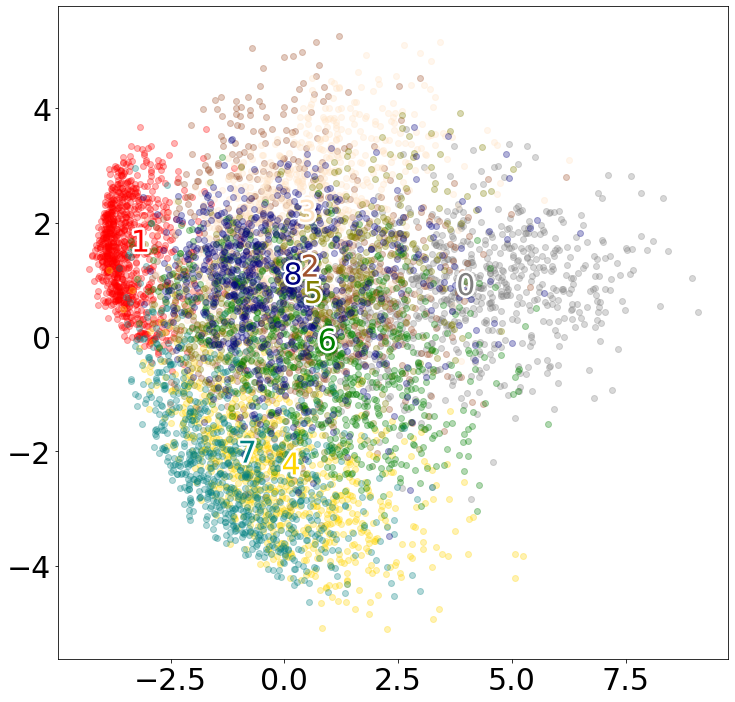

In [12]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 30})
ax = plt.subplot()
for i in range(9):
    xtext_swat, ytext_swat = x_train[np.where(y_train==i), 0:2].reshape(-1, 2).mean(axis=0)
    txt = ax.text(xtext_swat, ytext_swat, str(i), fontsize=30, c =color_list[i])
    txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])
for i in range(9):
    plt.scatter(x=x_train[np.where(y_train==i),0], y=x_train[np.where(y_train==i),1], alpha=0.3, c =color_list[i])
plt.show()

# 회귀분석 데이터

In [13]:
import pandas as pd

In [14]:
data = pd.read_csv("./hw4_2.csv", encoding='CP949')

In [15]:
data

,가격,회사명,년식,종류,연비,마력,토크,연료,LPG,하이브리드,배기량,중량,변속기
0,8620,기아,2015,대형,7.6,425,52.0,가솔린,0,0,5038,2105,자동
1,11150,현대,2015,대형,8.1,416,52.0,가솔린,0,0,5038,2065,자동
2,14570,현대,2015,대형,7.4,416,52.0,가솔린,0,0,5038,2145,자동
3,10687,쌍용,2015,대형,7.5,306,45.0,가솔린,0,0,4966,2070,자동
4,9324,쌍용,2015,대형,7.6,306,45.0,가솔린,0,0,4966,1960,자동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,741,대우,2012,경형,9.8,43,6.7,LPG,1,0,796,735,수동
405,958,대우,2015,경형,9.2,43,6.7,LPG,1,0,796,865,수동
406,964,대우,2015,경형,9.0,41,6.7,LPG,1,0,796,905,수동
407,904,대우,2013,경형,9.9,41,6.7,LPG,1,0,796,865,수동


In [16]:
y = data['가격']
y = np.array(y)
x = data[['년식',  '마력', '토크', '배기량']]

In [17]:
from sklearn.preprocessing import StandardScaler


x = StandardScaler().fit_transform(x)


In [18]:
x_train, x_test, y_train_, y_test_ = train_test_split(x, y, 
                                                    test_size = 0.1,
                                                   shuffle = True)

## 문제 3-1 예시

In [19]:
def adj_r2(y_real,y_pred,p,n) :
    # 문제 3-1 코드 구현 부분 #
    # scikit learn 의 r2_score 함수를 기반으로 제작하세요. 
    
    #
    return adj_r2